# Tables for stats comparison


## Me stats


In [11]:
from scipy.interpolate import make_interp_spline

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from utils import smooth

from data import get_MIM_df, get_SFP_df

In [12]:

# folder_path = 'data/networks/'

# file_list = glob.glob(folder_path + '*_stats_*')

# dfs = []

# for file in file_list:
#     df = pd.read_csv(file)
#     dfs.append(df)

# me_stats_df = pd.concat(dfs, ignore_index=True)

# mean_me_stats_df = round(me_stats_df.mean(), 2)
# print(mean_me_stats_df)


## Twitter stats


In [13]:

# twitter_graph = convert_csv_to_graph('data/twitter/twitter_combined.csv', whole=True)

# twitter_stats_df = pd.DataFrame(get_network_stats(twitter_graph), index=[0])

# twitter_stats_df.to_csv('data/twitter/twitter_combined_stats.csv', index=False)


In [14]:
# twitter_stats_df = pd.read_csv('data/twitter/twitter_combined_stats.csv')

# me_df = pd.read_csv('data/networks/ego_net_stats_test.csv')


# combined_stats_df = pd.concat([twitter_stats_df,  me_df], ignore_index=True)

# combined_stats_df = combined_stats_df.round(2)


# combined_stats_df = combined_stats_df.round(
#     {'number_of_nodes': 0, 'number_of_edges': 0})

# combined_stats_df = combined_stats_df.astype(object).T

# combined_stats_df = combined_stats_df.rename(
#     columns={0: 'Ego-Twitter SNAP network', 1: 'My generated network'})


# combined_stats_df.to_latex('data/results/combined_stats.tex')


## Misinformation and polarization shifts (10 networks, 200 iterations)


In [15]:
sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text


In [16]:


MIM_model_df, MIM_agent_df = get_MIM_df(1)
SFP_df = get_SFP_df()

MIM_y1 = MIM_model_df['average_opinion_all']
MIM_y2 = MIM_model_df['average_opinion_left']
MIM_y3 = MIM_model_df['average_opinion_right']

SFP_y1 = SFP_df['average_opinion_all']
SFP_y2 = SFP_df['average_opinion_left']
SFP_y3 = SFP_df['average_opinion_right']
SFP_y4 = SFP_df['polarization']

x = np.linspace(0, 1000, 1000)


## MIM vs SFP average opinions

# For posters

In [1]:

fig, ax = plt.subplots()

# fig.tight_layout()

spl1 = make_interp_spline(x, MIM_y1)
spl2 = make_interp_spline(x, MIM_y2)
spl3 = make_interp_spline(x, MIM_y3)

ax.plot(x, smooth(MIM_y1, 0.98), '-', color='black', label="All agents (MIM)")
ax.plot(x, smooth(MIM_y2, 0.98), '-', color='blue', label=" L-bot followers (MIM)")
ax.plot(x, smooth(MIM_y3, 0.98), '-', color='red', label="R-bot followers (MIM)")

ax.plot(x, smooth(SFP_y1, 0.98), '--', color='black', label="All agents (SFP)", alpha=0.5)
ax.plot(x, smooth(SFP_y2, 0.98), '--', color='blue', label="L-bot followers (SFP)", alpha=0.5)
ax.plot(x, smooth(SFP_y3, 0.98), '--', color='red', label="R-bot followers (SFP)", alpha=0.5)


ax.axhline(0.5, lw=5, label='ground truth', alpha=0.2)

ax.set_xticks(np.arange(0, 1100, 100))
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_ylim([0, 1])
ax.set_ylabel('average opinion')
ax.set_xlabel('simulation periods')
plt.title(label='Replication (MIM) vs Original (SFP)')
ax.legend(loc='best',prop={'size': 8})

plt.savefig('data/graphs/MIM1_vs_SFP_op.png', dpi=500)

# axes[1].plot(x[:200], MIM_y1[:200], color='black')
# axes[1].plot(x[:200], MIM_y2[:200], color='blue')
# axes[1].plot(x[:200], MIM_y3[:200], color='red')

NameError: name 'plt' is not defined

## MIM vs SFP polarization

/tmp/ipykernel_8473/3027773181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFP_y[20:] = smooth(SFP_y[20:].reset_index(drop=True), .98)


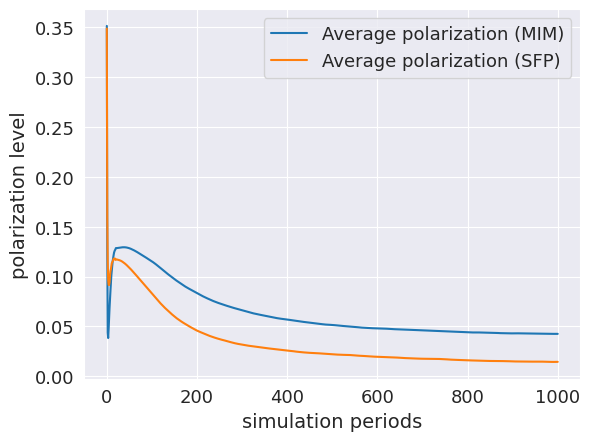

In [18]:
fig, ax = plt.subplots()


MIM_y = MIM_model_df['polarization']
SFP_y = SFP_df['polarization']


# Apply partial smoothing
MIM_y[20:] = smooth(MIM_y[20:].reset_index(drop=True), .98)
SFP_y[20:] = smooth(SFP_y[20:].reset_index(drop=True), .98)

ax.plot(x, MIM_y, label='Average polarization (MIM)')
ax.plot(x, SFP_y, label='Average polarization (SFP)')
ax.legend(loc='best')

ax.set_ylabel('polarization level')
ax.set_xlabel('simulation periods')

plt.savefig('data/graphs/MIM_vs_SFP_pol.png')


0      0.078602
1      0.017230
2      0.008528
3      0.006836
4      0.006893
         ...   
995    0.046116
996    0.046156
997    0.046095
998    0.046130
999    0.046124
Name: misinformation, Length: 1000, dtype: float64


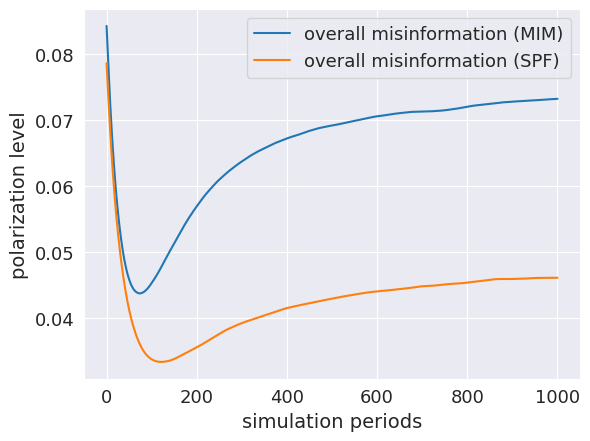

In [19]:
fig, ax = plt.subplots()


MIM_y = MIM_model_df['misinformation']
SFP_y = SFP_df['misinformation']

ax.plot(x, smooth(MIM_y, 0.98), label='overall misinformation (MIM)')
ax.plot(x, smooth(SFP_y, 0.98), label='overall misinformation (SPF)')
ax.legend(loc='best')

ax.set_ylabel('polarization level')
ax.set_xlabel('simulation periods')

plt.savefig('data/graphs/MIM_vs_SFP_pol.png')

print(SFP_y)



<AxesSubplot: xlabel='step', ylabel='opinion'>

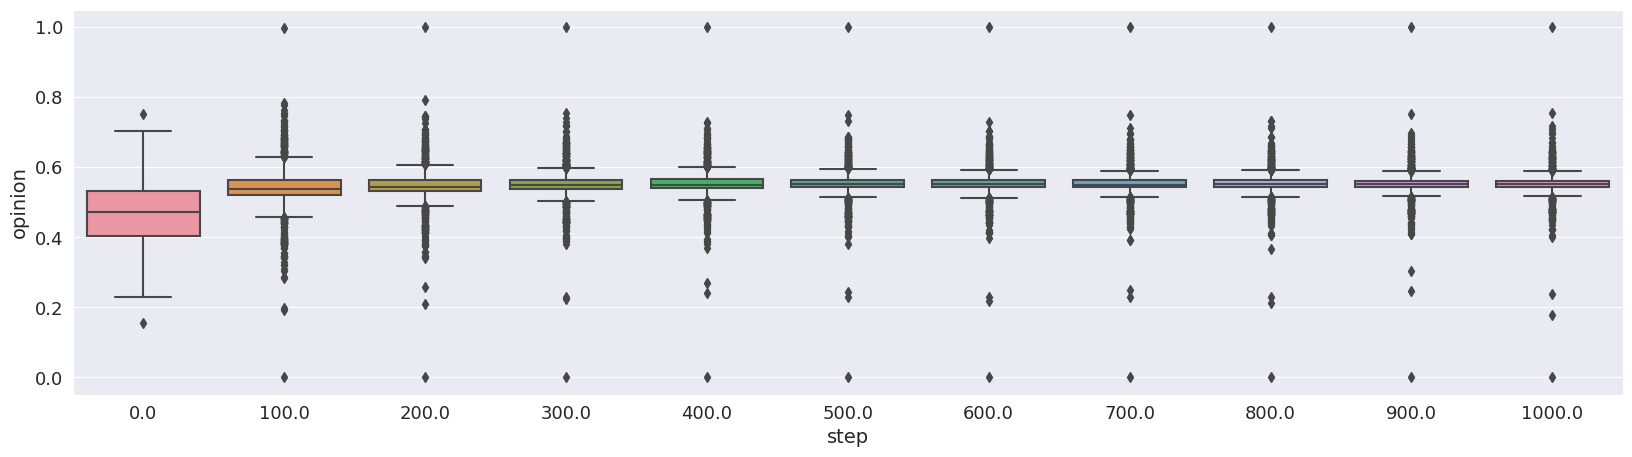

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = MIM_agent_df['step'], 
                y = MIM_agent_df['opinion'], 
                ax = ax)


